In [1]:
import torch
import numpy as np
import torch.nn as nn  # Modulo de Redes Neuronales, aqui hay "Regresiones"
import torch.optim as optim  # Modulo de Optimizacion

import matplotlib.pyplot as plt  # Graficos

# Regresion Lineal

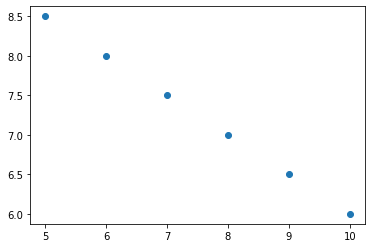

In [2]:
car_prices = [5, 6, 7, 8, 9, 10]            # Precios de Automoviles
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]   # Unidades vendidas de cada modelo

plt.scatter(car_prices, units_sold)

In [3]:
# Este formato es muy util para trabajar con tensores

prices_array = np.array(car_prices).reshape(-1, 1) # Cambio de formato
units_array = np.array(units_sold).reshape(-1, 1) # Cambio de formato

prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)  # Motifica el arreglo a float
units = torch.from_numpy(units_array).float() # No necesita que los gradiantes sean TRUE

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True),
 torch.Size([6, 1]))

0.016589617356657982


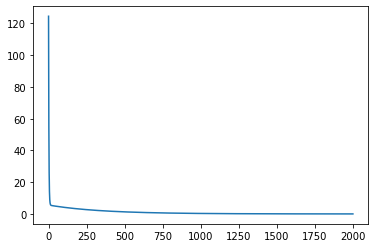

In [5]:
# Construccion del modelo

model = nn.Linear(1, 1)  # Con esto se forza que el modelo sea lineal

loss_function = nn.MSELoss()   # Parte del modelo

optimizer = optim.SGD(model.parameters(), lr=0.015)   # Stocastic Gradient D..., para el optimizador __[l]earning [r]ate__

losses = []            # Se define la variable para las perdidas
iterations = 2000 # Cantidad de iteraciones

for i in range(iterations):
  pred = model(prices)  #Se crea una variable con el modelo usando la variable precio  
  loss = loss_function(pred, units) # Se asigna a una variable la funcion de perdida, realidad vs prediccion
  losses.append(loss.data) # Se agrega la informacion en un arreglo aparte
  
  optimizer.zero_grad()  # Se reinician los gradiantes, es una especie de Cache
  loss.backward()  # Parte del Training loop
  optimizer.step() 

print(float(loss)) 
plt.plot(range(iterations), losses) 

# El resultado final es el loss

In [6]:
x = torch.Tensor([[14.0]])  # Numero de Unidades vendidas segun el precio
p = model(x)
p
# Si el precio es 14 se venderan 4.4 unidades aprox

tensor([[4.4496]], grad_fn=<AddmmBackward>)

# Regresion Logistica

In [7]:
n = 100   # Coleccion de 100 pares
h = n//2  # division para solo obtener enteros
dimen = 2

data = np.random.randn(n, dimen)*3
#data

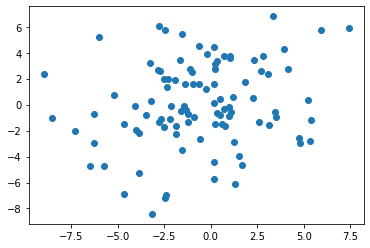

In [8]:
plt.scatter(data[:,0], data[:,1])  # Un grupo con una mitad y otro grupo con la otra mitad

In [9]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))  # Nube N° 1

In [10]:
data[h:, :]= data[h:, :] + 3*np.ones((h, dimen)) # Nube N° 2

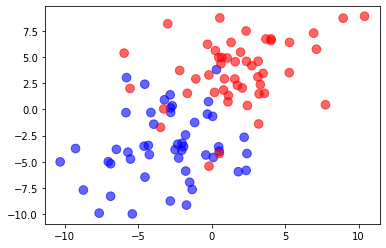

In [11]:
colors = ['blue','red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6) # s = size y alpha es alpha

In [12]:
# Preparacion de datos

target = np.array([0]*h + [1]*h).reshape(n, 1)  # [0] y [1] divididos por [h]alf

x = torch.from_numpy(data).float().requires_grad_(True)  # Aqui se fuerza el __Flotante__ y que use __Gradiantes__

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.2488, grad_fn=<BinaryCrossEntropyBackward>)

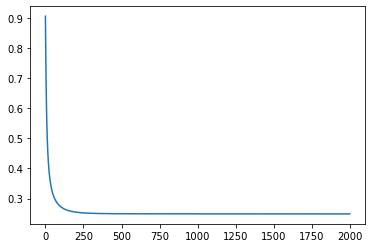

In [13]:
# Sequential sirve para combinar funciones

model = nn.Sequential( 
          nn.Linear(2,1),
          nn.Sigmoid()
      )

# Utiliza el modelo BCE
loss_function = nn.BCELoss()

# Optimizer se mantiene igual
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
  result = model(x)
  
  loss = loss_function(result, y)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [16]:
# Prueba del modeo

blue = torch.Tensor([[-5, -6]])   # Input, se espera que sea Azul
predictionval = model(blue)
prediction = model(blue).data[0][0] > 0.5  # Si el valor "Prediction" es menor a 0.5, entonces sera azul
print(predictionval)
print(colors[prediction])

red = torch.Tensor([[8, 6]])
predictionval = model(red)
prediction = model(red).data[0][0] > 0.5  # Si el valor es mayor a 0.5, entonces sera rojo
print(predictionval)
print(colors[prediction])


tensor([[0.0038]], grad_fn=<SigmoidBackward>)
blue
tensor([[0.9994]], grad_fn=<SigmoidBackward>)
red


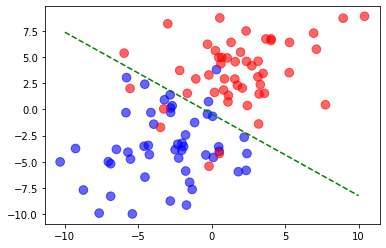

In [17]:
# Codigo para graficar

w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6) # Exactamente el mismo plot

x_axis = np.linspace(-10, 10, n) # Linea de separacion, de -10 a 10
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--') # Linea verde